# Flight Fare Prediction

by :- 1905189-Pratyush Aanand, 1905600-Ashutosh Mishra, 1905634-Sambhav Choudhary

AIM :- Using Ml we are gonna predict the fare of flight

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Dataset

In [2]:
dataframe=pd.read_csv('data.csv')

In [3]:
dataframe.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
dataframe.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
dataframe.shape

(10683, 11)

In [6]:
dataframe.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
dataframe.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### removing empty cells

In [9]:
dataframe=dataframe.dropna()

In [10]:
dataframe.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
dataframe.shape

(10682, 11)

# Data Preprocessing

<AxesSubplot:title={'center':'Price Distribution'}, xlabel='Price', ylabel='Count'>

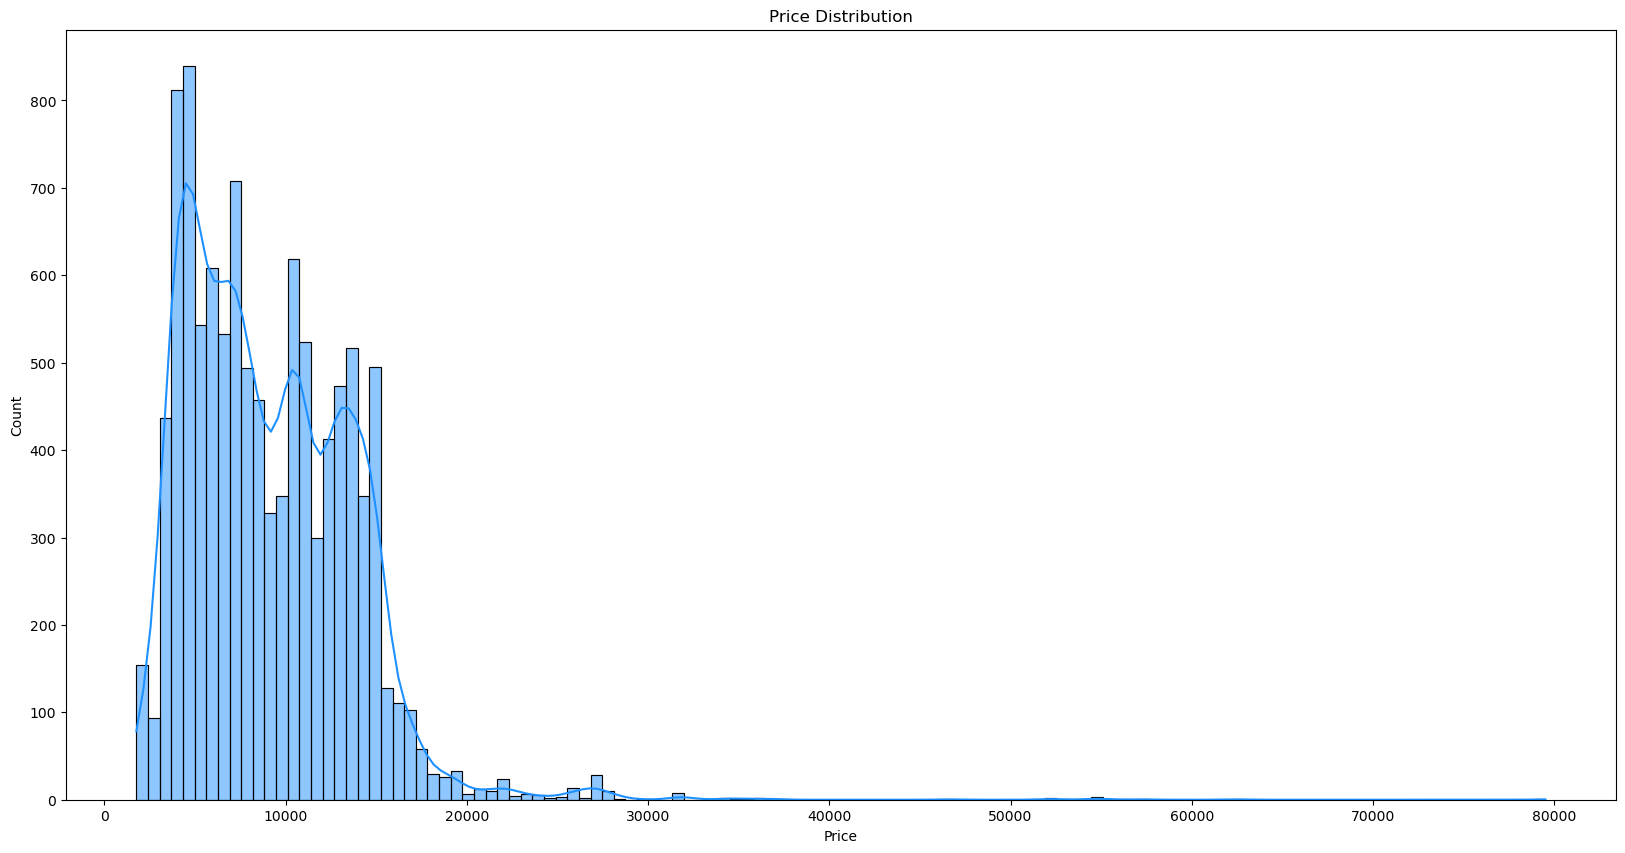

In [12]:
plt.figure(figsize=(20, 10))
plt.title("Price Distribution")
plt.xlabel("Price")
sns.histplot(dataframe['Price'],kde=True,color='dodgerblue')

In [13]:
dataframe['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

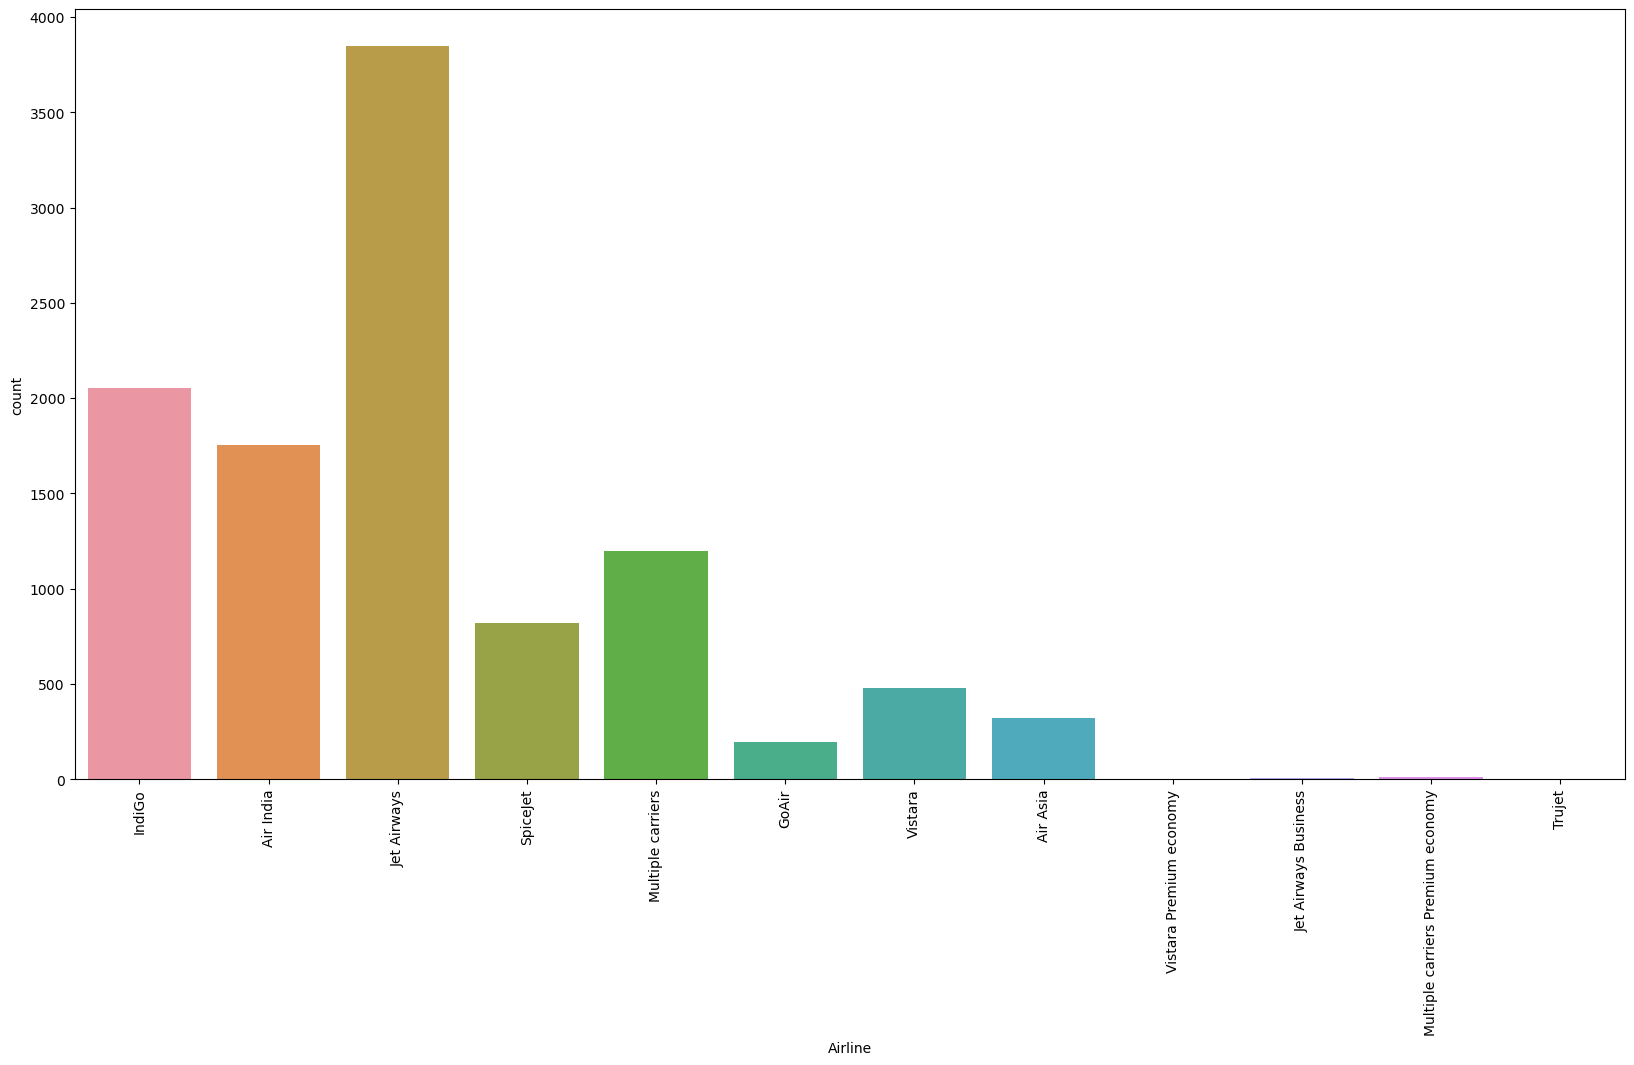

In [14]:
plt.figure(figsize=(20, 10))
plt.xlabel('Airline')
plt.ylabel('count')
sns.countplot(x='Airline',data=dataframe)
plt.xticks(rotation=90)

<function matplotlib.pyplot.show(close=None, block=None)>

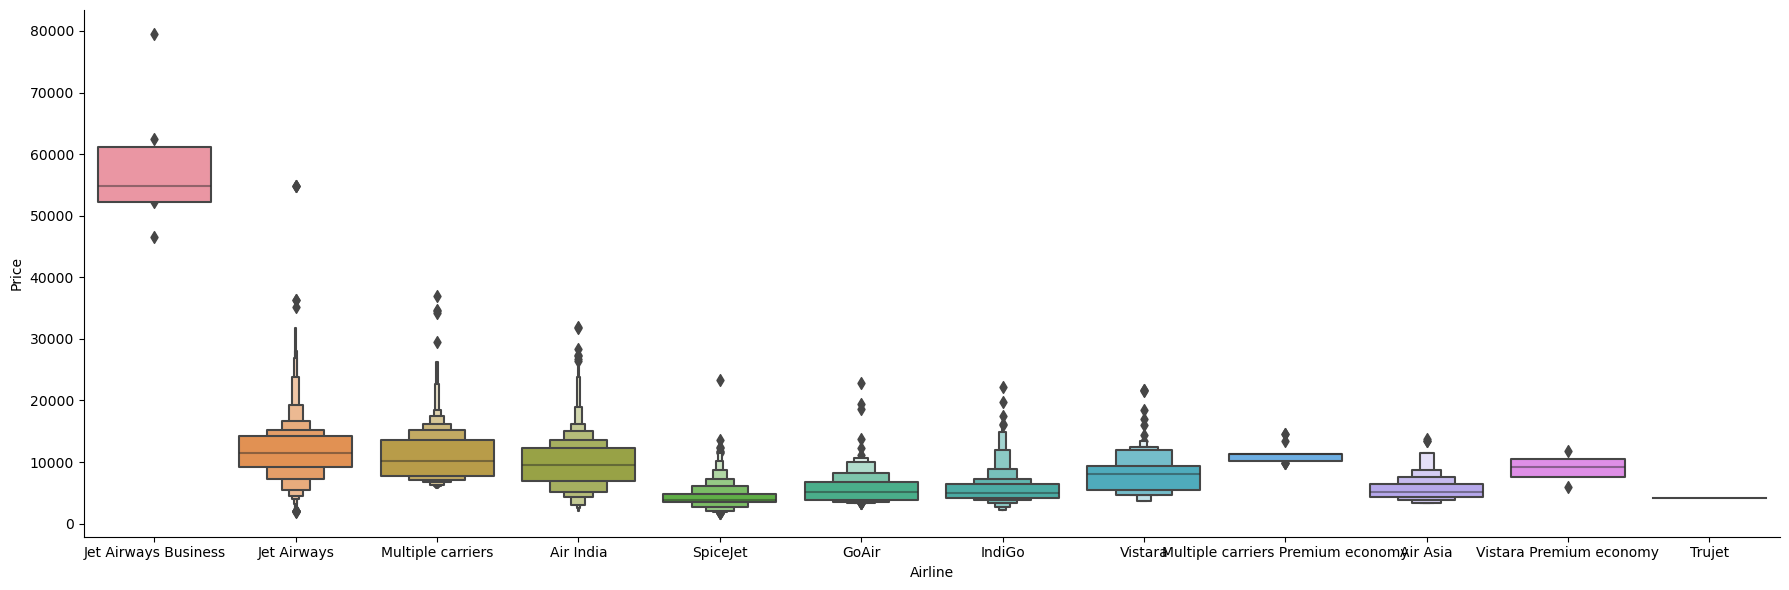

In [15]:
sns.catplot(y='Price',x='Airline',data=dataframe.sort_values('Price',ascending=False),kind="boxen",height=6,aspect=3)
plt.show

In [16]:
dataframe['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

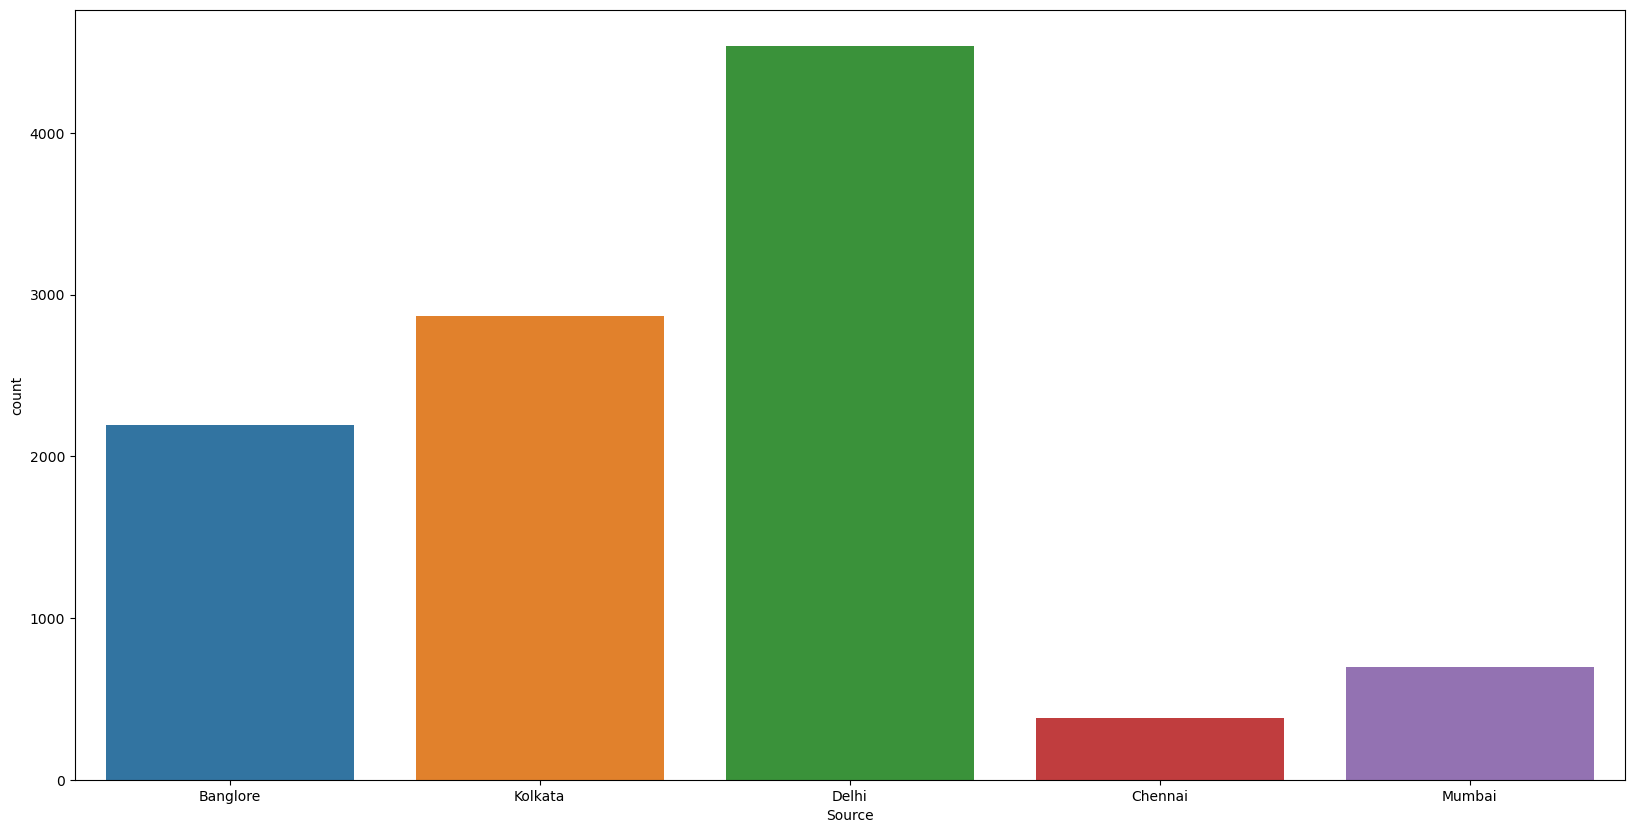

In [17]:
plt.figure(figsize=(20, 10))
plt.xlabel('Source')
plt.ylabel('count')
sns.countplot(x='Source',data=dataframe)

<function matplotlib.pyplot.show(close=None, block=None)>

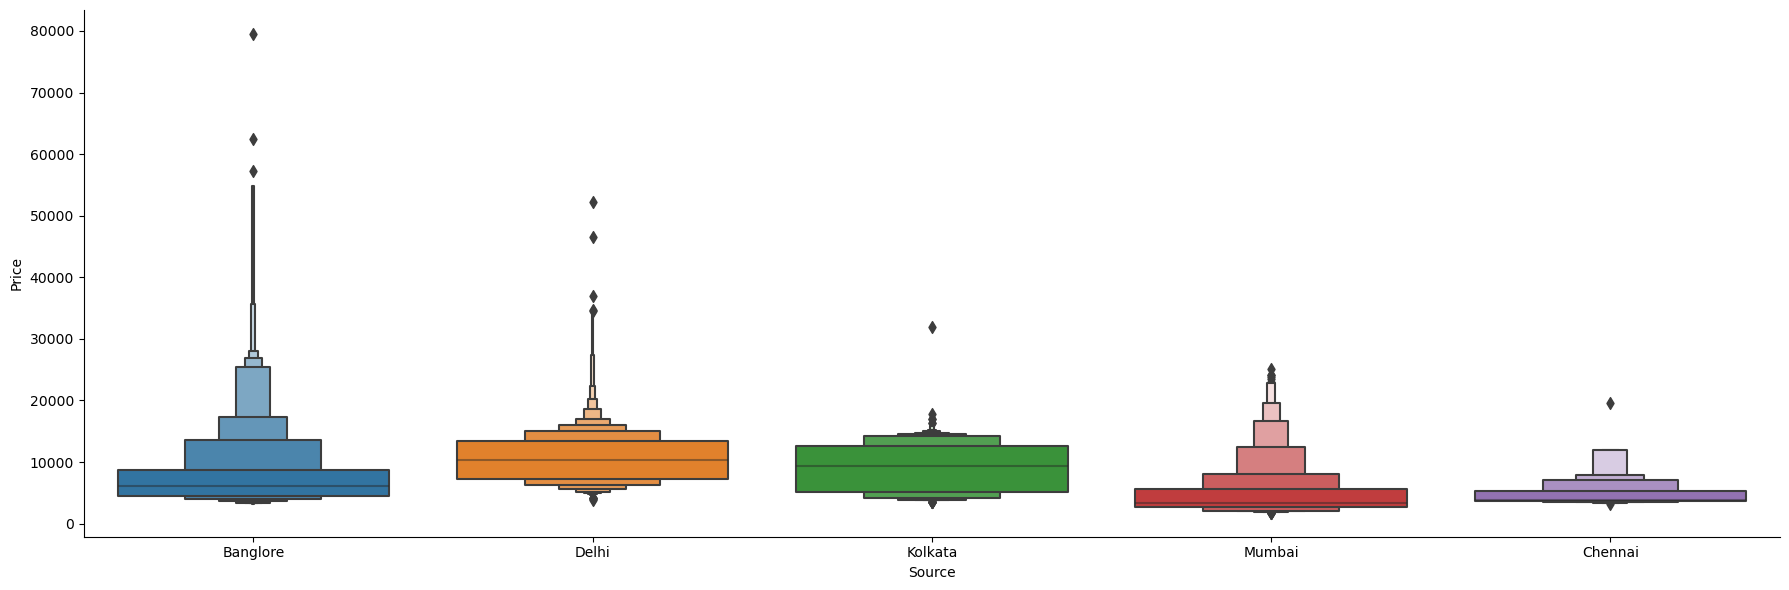

In [18]:
sns.catplot(y='Price',x='Source',data=dataframe.sort_values('Price',ascending=False),kind="boxen",height=6,aspect=3)
plt.show

In [19]:
dataframe['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

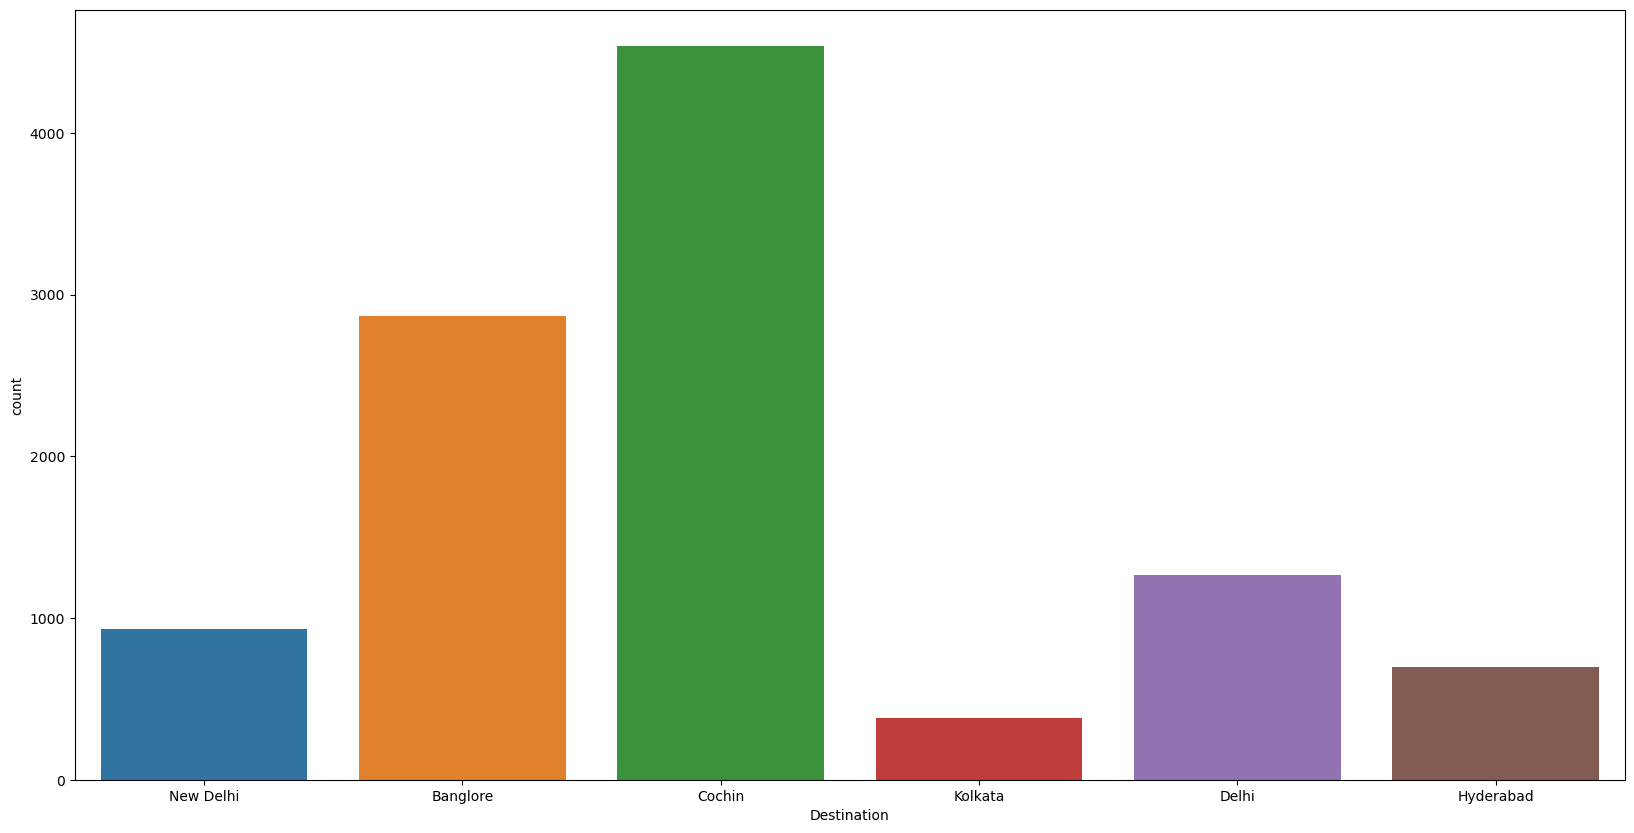

In [20]:
plt.figure(figsize=(20, 10))
plt.xlabel('Destination')
plt.ylabel('count')
sns.countplot(x='Destination',data=dataframe)

<function matplotlib.pyplot.show(close=None, block=None)>

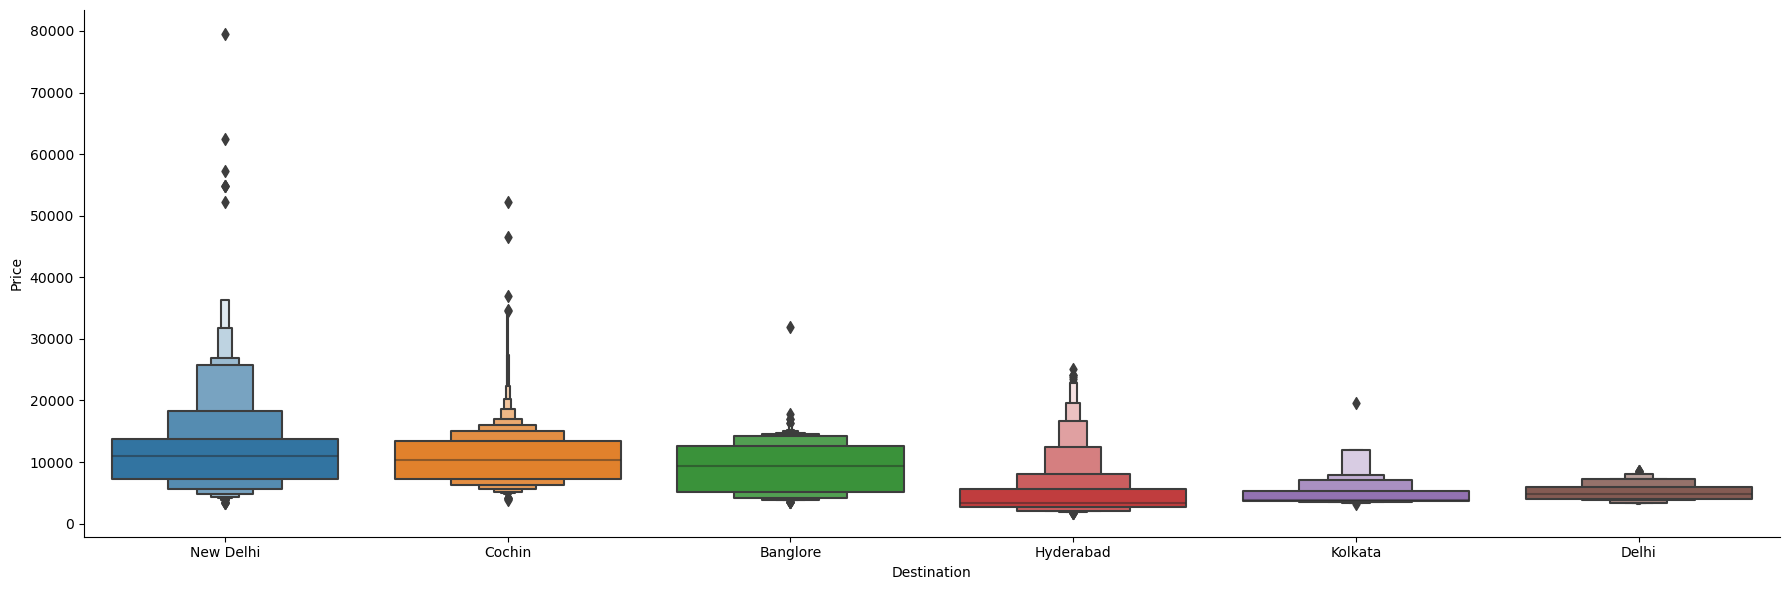

In [21]:
sns.catplot(y='Price',x='Destination',data=dataframe.sort_values('Price',ascending=False),kind="boxen",height=6,aspect=3)
plt.show

In [22]:
dataframe.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [23]:
dataframe['Date']=dataframe['Date_of_Journey'].str.split('/').str[0]
dataframe['Month']=dataframe['Date_of_Journey'].str.split('/').str[1]
dataframe['Year']=dataframe['Date_of_Journey'].str.split('/').str[2]

In [24]:
dataframe.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [25]:
dataframe=dataframe.drop(['Date_of_Journey'],axis=1)

In [26]:
dataframe.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [27]:
dataframe.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Date               object
Month              object
Year               object
dtype: object

In [28]:
dataframe['Date']=dataframe['Date'].astype(int)
dataframe['Month']=dataframe['Month'].astype(int)
dataframe['Year']=dataframe['Year'].astype(int)

In [29]:
dataframe.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
dtype: object

In [30]:
dataframe['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

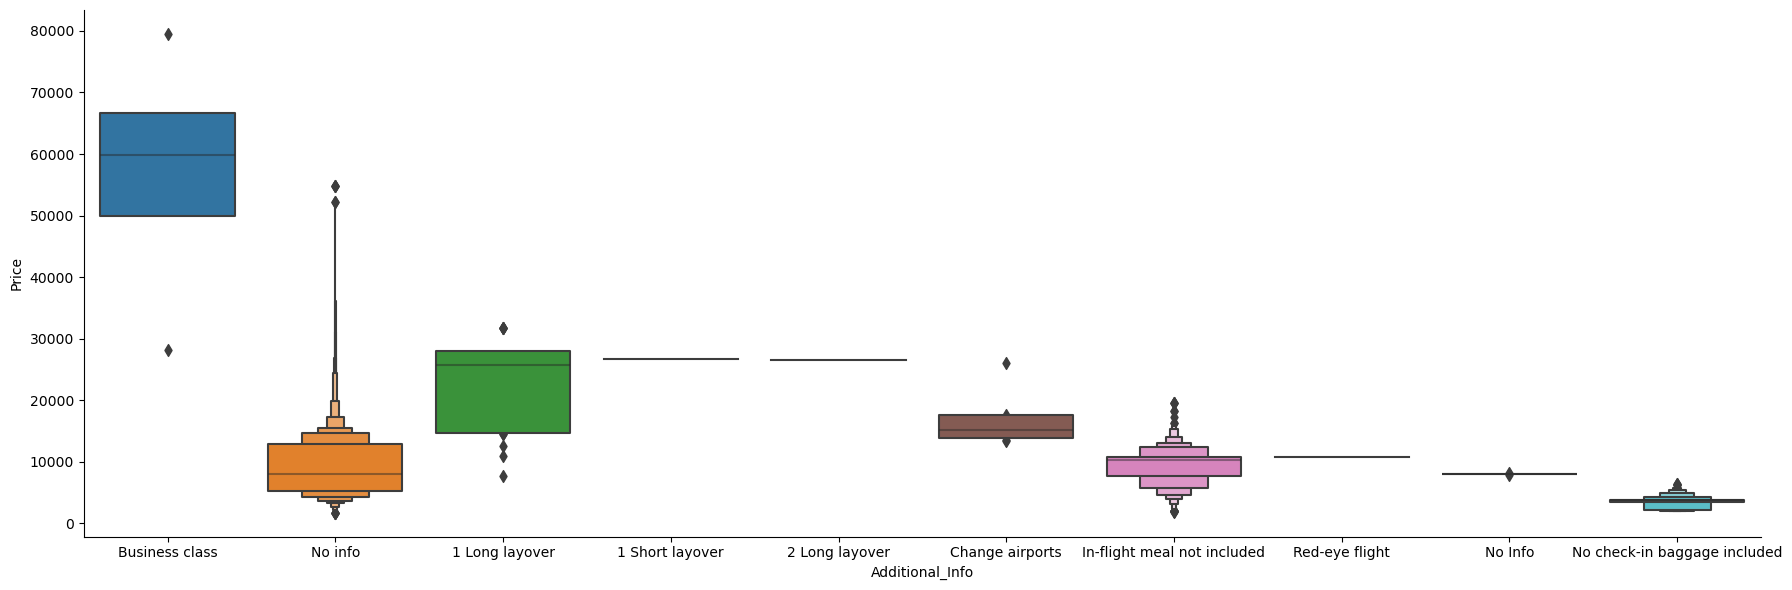

In [31]:
sns.catplot(y='Price',x='Additional_Info',data=dataframe.sort_values('Price',ascending=False),kind="boxen",height=6,aspect=3)
plt.show

In [32]:
dataframe['Arrival_Time']=dataframe['Arrival_Time'].str.split(' ').str[0]

In [33]:
dataframe.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [34]:
dataframe['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
dataframe['Total_Stops']=dataframe['Total_Stops'].replace('non-stop','0 stop')

In [36]:
dataframe.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [37]:
dataframe['Layover']=dataframe['Total_Stops'].str.split(" ").str[0]

In [38]:
dataframe=dataframe.drop(['Total_Stops'],axis=1)

In [39]:
dataframe.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Layover
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,3,2019,1


In [40]:
dataframe.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
Layover            object
dtype: object

In [41]:
dataframe['Layover']=dataframe['Layover'].astype(int)

<AxesSubplot:title={'center':'Total Stops V Price'}, xlabel='Layover', ylabel='Price'>

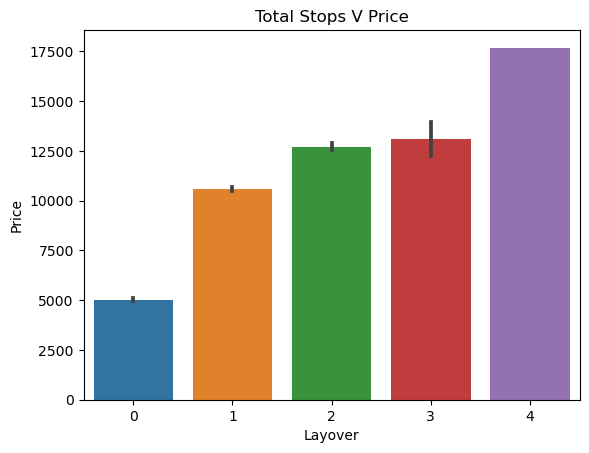

In [42]:
plt.title('Total Stops V Price')
sns.barplot(x=dataframe['Layover'],y=dataframe['Price'])

In [43]:
dataframe['Arrival_Hour']=dataframe['Arrival_Time'].str.split(':').str[0]
dataframe['Arrival_Min']=dataframe['Arrival_Time'].str.split(':').str[1]

In [44]:
dataframe=dataframe.drop(['Arrival_Time'],axis=1)

In [45]:
dataframe.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Layover,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897,24,3,2019,0,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882,9,6,2019,2,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302,1,3,2019,1,21,35


In [46]:
dataframe.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Duration           object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
Layover             int32
Arrival_Hour       object
Arrival_Min        object
dtype: object

In [47]:
dataframe['Arrival_Hour']=dataframe['Arrival_Hour'].astype(int)
dataframe['Arrival_Min']=dataframe['Arrival_Min'].astype(int)

In [48]:
dataframe.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Duration           object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
Layover             int32
Arrival_Hour        int32
Arrival_Min         int32
dtype: object

In [49]:
dataframe['Dep_Hour']=dataframe['Dep_Time'].str.split(':').str[0]
dataframe['Dep_Min']=dataframe['Dep_Time'].str.split(':').str[1]

In [50]:
dataframe=dataframe.drop(['Dep_Time'],axis=1)

In [51]:
dataframe.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Layover,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,2,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,2,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,1,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,2019,1,21,35,16,50


In [52]:
dataframe.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
Layover             int32
Arrival_Hour        int32
Arrival_Min         int32
Dep_Hour           object
Dep_Min            object
dtype: object

In [53]:
dataframe['Dep_Hour']=dataframe['Dep_Hour'].astype(int)
dataframe['Dep_Min']=dataframe['Dep_Min'].astype(int)

In [54]:
dataframe.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
Layover             int32
Arrival_Hour        int32
Arrival_Min         int32
Dep_Hour            int32
Dep_Min             int32
dtype: object

In [55]:
dataframe['r1']=dataframe['Route'].str.split('→ ').str[0]
dataframe['r2']=dataframe['Route'].str.split('→ ').str[1]
dataframe['r3']=dataframe['Route'].str.split('→ ').str[2]
dataframe['r4']=dataframe['Route'].str.split('→ ').str[3]
dataframe['r5']=dataframe['Route'].str.split('→ ').str[4]

In [56]:
dataframe['r1'].fillna("None",inplace=True)
dataframe['r2'].fillna("None",inplace=True)
dataframe['r3'].fillna("None",inplace=True)
dataframe['r4'].fillna("None",inplace=True)
dataframe['r5'].fillna("None",inplace=True)

In [57]:
dataframe.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Layover,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,r1,r2,r3,r4,r5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [58]:
dataframe=dataframe.drop(['Route'],axis=1)

In [59]:
duration=list(dataframe['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]
dataframe['Duration']=duration

In [60]:
dataframe['Dur_h']=dataframe['Duration'].str.split('h').str[0]
dataframe['Dur_m']=dataframe['Duration'].str.split(' ').str[1]
dataframe['Dur_m']=dataframe['Dur_m'].str.split('m').str[0]

In [61]:
dataframe.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Layover,...,Arrival_Min,Dep_Hour,Dep_Min,r1,r2,r3,r4,r5,Dur_h,Dur_m
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897,24,3,2019,0,...,10,22,20,BLR,DEL,None,None,None,2,50
1,Air India,Kolkata,Banglore,7h 25m,No info,7662,1,5,2019,2,...,15,5,50,CCU,IXR,BBI,BLR,None,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,No info,13882,9,6,2019,2,...,25,9,25,DEL,LKO,BOM,COK,None,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218,12,5,2019,1,...,30,18,5,CCU,NAG,BLR,None,None,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302,1,3,2019,1,...,35,16,50,BLR,NAG,DEL,None,None,4,45


In [62]:
dataframe=dataframe.drop(['Duration'],axis=1)

In [63]:
dataframe.dtypes

Airline            object
Source             object
Destination        object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
Layover             int32
Arrival_Hour        int32
Arrival_Min         int32
Dep_Hour            int32
Dep_Min             int32
r1                 object
r2                 object
r3                 object
r4                 object
r5                 object
Dur_h              object
Dur_m              object
dtype: object

In [64]:
dataframe['Dur_h']=dataframe['Dur_h'].astype(int)
dataframe['Dur_m']=dataframe['Dur_m'].astype(int)

# LabelEncoding

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [66]:
dataframe['Airline']=le.fit_transform(dataframe['Airline'])
dataframe['Source']=le.fit_transform(dataframe['Source'])
dataframe['Destination']=le.fit_transform(dataframe['Destination'])
dataframe['Additional_Info']=le.fit_transform(dataframe['Additional_Info'])
dataframe['r1']=le.fit_transform(dataframe['r1'])
dataframe['r2']=le.fit_transform(dataframe['r2'])
dataframe['r3']=le.fit_transform(dataframe['r3'])
dataframe['r4']=le.fit_transform(dataframe['r4'])
dataframe['r5']=le.fit_transform(dataframe['r5'])

In [67]:
dataframe.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Layover,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,r1,r2,r3,r4,r5,Dur_h,Dur_m
0,3,0,5,8,3897,24,3,2019,0,1,10,22,20,0,13,24,12,4,2,50
1,1,3,0,8,7662,1,5,2019,2,13,15,5,50,2,25,1,3,4,7,25
2,4,2,1,8,13882,9,6,2019,2,4,25,9,25,3,32,4,5,4,19,0
3,3,3,0,8,6218,12,5,2019,1,23,30,18,5,2,34,3,12,4,5,25
4,3,0,5,8,13302,1,3,2019,1,21,35,16,50,0,34,8,12,4,4,45


In [68]:
dataframe=dataframe.drop(['Year'],axis=1)

In [69]:
dataframe.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Layover,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,r1,r2,r3,r4,r5,Dur_h,Dur_m
0,3,0,5,8,3897,24,3,0,1,10,22,20,0,13,24,12,4,2,50
1,1,3,0,8,7662,1,5,2,13,15,5,50,2,25,1,3,4,7,25
2,4,2,1,8,13882,9,6,2,4,25,9,25,3,32,4,5,4,19,0
3,3,3,0,8,6218,12,5,1,23,30,18,5,2,34,3,12,4,5,25
4,3,0,5,8,13302,1,3,1,21,35,16,50,0,34,8,12,4,4,45


# Checking Collinearity

In [70]:
dataframe.corr()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Layover,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,r1,r2,r3,r4,r5,Dur_h,Dur_m
Airline,1.000000,-0.013397,0.018446,-0.060748,-0.039565,0.026137,0.024674,-0.199396,-0.007567,-0.071092,-0.035269,-0.059922,0.035309,-0.061413,0.052975,0.261934,0.055025,-0.158136,-0.028009
Source,-0.013397,1.000000,-0.592576,-0.022109,0.015999,0.004902,0.183268,0.192840,0.025635,0.021040,0.059047,-0.056998,0.437892,0.035847,-0.279499,-0.077350,-0.011251,0.166121,-0.145193
Destination,0.018446,-0.592576,1.000000,0.026821,-0.071122,-0.041025,-0.364682,-0.295476,-0.039729,0.017196,-0.072997,0.127931,-0.483341,0.077887,0.423357,0.135107,0.014689,-0.258446,0.061235
Additional_Info,-0.060748,-0.022109,0.026821,1.000000,-0.065463,-0.016296,-0.051491,-0.082439,0.026204,0.041310,-0.050983,-0.019392,0.015319,0.077884,0.170010,-0.042929,-0.032782,-0.168815,0.046910
Price,-0.039565,0.015999,-0.071122,-0.065463,1.000000,-0.153774,-0.103643,0.603897,0.024244,-0.086155,0.006799,-0.024458,0.182169,-0.087240,-0.579521,-0.314790,-0.053100,0.508778,-0.124855
Date,0.026137,0.004902,-0.041025,-0.016296,-0.153774,1.000000,-0.038359,-0.009451,-0.003245,-0.017510,0.002170,-0.008170,0.079724,-0.024741,0.021849,-0.018842,0.004578,-0.022059,-0.008940
Month,0.024674,0.183268,-0.364682,-0.051491,-0.103643,-0.038359,1.000000,0.054383,-0.003927,-0.100626,0.039127,-0.059267,0.230657,0.048409,-0.094942,-0.073213,-0.001623,0.016141,-0.040897
Layover,-0.199396,0.192840,-0.295476,-0.082439,0.603897,-0.009451,0.054383,1.000000,0.038140,-0.106940,-0.061476,-0.002618,0.428918,0.162259,-0.778937,-0.726108,-0.200716,0.739916,-0.136706
Arrival_Hour,-0.007567,0.025635,-0.039729,0.026204,0.024244,-0.003245,-0.003927,0.038140,1.000000,-0.154363,0.005180,0.043122,0.015895,-0.012224,-0.080173,0.049044,-0.027487,0.055276,-0.118309
Arrival_Min,-0.071092,0.021040,0.017196,0.041310,-0.086155,-0.017510,-0.100626,-0.106940,-0.154363,1.000000,0.067911,-0.017597,-0.172995,0.045967,0.157028,-0.022839,0.019033,-0.074450,0.151628


In [124]:
dataframe.corr().to_csv('coll.csv')

<AxesSubplot:>

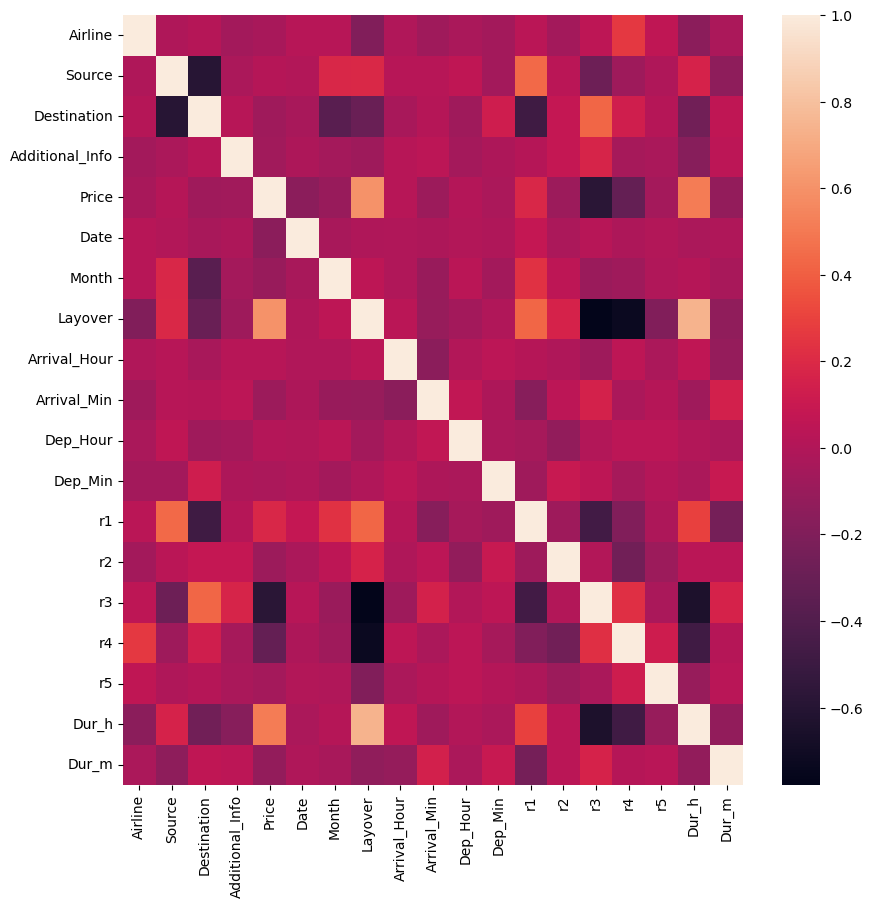

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(dataframe.corr())

# Feature Selection

In [72]:
dataframe=dataframe[['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Layover', 'Arrival_Hour', 'Arrival_Min', 'Dep_Hour', 'Dep_Min', 'r1',
       'r2', 'r3', 'r4', 'r5','Dur_h','Dur_m','Price']]

In [73]:
dataframe.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Layover,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,r1,r2,r3,r4,r5,Dur_h,Dur_m,Price
0,3,0,5,8,24,3,0,1,10,22,20,0,13,24,12,4,2,50,3897
1,1,3,0,8,1,5,2,13,15,5,50,2,25,1,3,4,7,25,7662
2,4,2,1,8,9,6,2,4,25,9,25,3,32,4,5,4,19,0,13882
3,3,3,0,8,12,5,1,23,30,18,5,2,34,3,12,4,5,25,6218
4,3,0,5,8,1,3,1,21,35,16,50,0,34,8,12,4,4,45,13302


In [74]:
x=dataframe.drop(['Price'],axis=1)
y=dataframe['Price']

In [75]:
x.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Layover,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,r1,r2,r3,r4,r5,Dur_h,Dur_m
0,3,0,5,8,24,3,0,1,10,22,20,0,13,24,12,4,2,50
1,1,3,0,8,1,5,2,13,15,5,50,2,25,1,3,4,7,25
2,4,2,1,8,9,6,2,4,25,9,25,3,32,4,5,4,19,0
3,3,3,0,8,12,5,1,23,30,18,5,2,34,3,12,4,5,25
4,3,0,5,8,1,3,1,21,35,16,50,0,34,8,12,4,4,45


In [76]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [77]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [79]:
model=SelectFromModel(Lasso(alpha=0.05,random_state=0))

In [80]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [81]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [82]:
selected_features=x_train.columns[(model.get_support())]

In [83]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Layover', 'Arrival_Hour', 'Arrival_Min', 'Dep_Hour', 'Dep_Min', 'r1',
       'r2', 'r3', 'r4', 'r5', 'Dur_h', 'Dur_m'],
      dtype='object')

In [84]:
from sklearn.ensemble import ExtraTreesRegressor

In [85]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)

ExtraTreesRegressor()

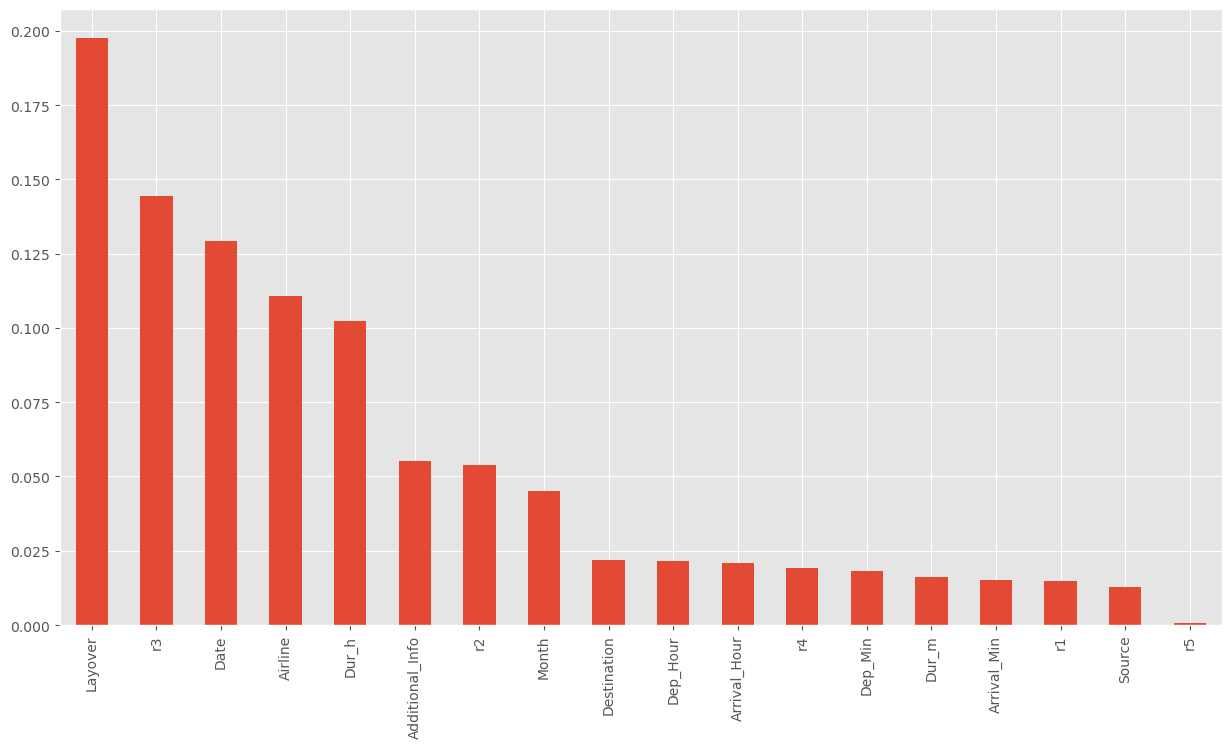

In [86]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
feature_importance=pd.Series(ETR.feature_importances_,index=x.columns)
feature_importance.nlargest(35).plot(kind='bar')
plt.show()

In [87]:
perf=[]

# Splitting Data into training and testing set

In [88]:
x=dataframe.iloc[:,:-1].values
y=dataframe.iloc[:,-1].values

In [89]:
print(x)

[[ 3  0  5 ...  4  2 50]
 [ 1  3  0 ...  4  7 25]
 [ 4  2  1 ...  4 19  0]
 ...
 [ 4  0  2 ...  4  3  0]
 [10  0  5 ...  4  2 40]
 [ 1  2  1 ...  4  8 20]]


In [90]:
print(y)

[ 3897  7662 13882 ...  7229 12648 11753]


In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

# Multiple Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
MLR=LinearRegression()
MLR.fit(x_train,y_train)

LinearRegression()

In [93]:
y_pred=MLR.predict(x_test)

In [94]:
from sklearn import metrics
t=metrics.r2_score(y_test,y_pred)
u=metrics.mean_absolute_error(y_test,y_pred)
v=metrics.mean_squared_error(y_test,y_pred)
w=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Multiple Regression r2_score =',t)
perf.append(['Multiple Regression',t,u,v,w])

Multiple Regression r2_score = 0.489696475781607


# Support Vector Regression

In [95]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_Y=StandardScaler()
y_train_2=y_train.reshape(len(y_train),1)
y_test_2=y_test.reshape(len(y_test),1)
x_train_2=sc_X.fit_transform(x_train)
y_train_2=sc_Y.fit_transform(y_train_2)

In [96]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x_train_2,y_train_2)

C:\Users\ashto\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [97]:
y_pred_2=regressor.predict(sc_X.transform(x_test))
y_pred_2=y_pred_2.reshape(len(y_pred_2),1)
y_pred_2=sc_Y.inverse_transform(y_pred_2)

In [98]:
t=metrics.r2_score(y_test_2,y_pred_2)
u=metrics.mean_absolute_error(y_test,y_pred)
v=metrics.mean_squared_error(y_test,y_pred)
w=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Support Vector Regression r2_score=',t)
perf.append(['Support Vector Regression',t,u,v,w])

Support Vector Regression r2_score= 0.740900317560284


# Decision Tree

In [99]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(random_state=0)
DTR.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [100]:
y_pred=DTR.predict(x_test)

In [101]:
t=metrics.r2_score(y_test,y_pred)
u=metrics.mean_absolute_error(y_test,y_pred)
v=metrics.mean_squared_error(y_test,y_pred)
w=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Decision Tree r2_score =',t)
perf.append(['Decision Tree Regression',t,u,v,w])

Decision Tree r2_score = 0.7788913969921891


# Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [103]:
y_pred=RFR.predict(x_test)

In [104]:
t=metrics.r2_score(y_test,y_pred)
u=metrics.mean_absolute_error(y_test,y_pred)
v=metrics.mean_squared_error(y_test,y_pred)
w=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Random Forest r2_score =',t)
perf.append(['Random Forest Regression',t,u,v,w])

Random Forest r2_score = 0.8624899551836451


# XGBoost

In [105]:
from xgboost import XGBRegressor
xg_b=XGBRegressor()

In [106]:
xg_b.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [107]:
y_pred=xg_b.predict(x_test)

In [108]:
t=metrics.r2_score(y_test,y_pred)
u=metrics.mean_absolute_error(y_test,y_pred)
v=metrics.mean_squared_error(y_test,y_pred)
w=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('XGBoost r2_score =',t)
perf.append(['XGBoost Regression',t,u,v,w])

XGBoost r2_score = 0.8593768414828512


# XGBOOST Hypertuned

In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
params={
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsmaple_bytree" : [0.3,0.4,0.5,0.7]
}

In [111]:
xgb_model_tuned=RandomizedSearchCV(estimator=xg_b,param_distributions=params,
                                   scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,
                                    random_state=42,n_jobs=1)

In [112]:
xgb_model_tuned.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[07:07:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsmaple_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsmaple_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.1s
[07:07:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsmaple_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you

[CV] END colsmaple_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=5; total time=   0.3s
[07:07:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsmaple_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsmaple_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=5; total time=   0.3s
[07:07:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsmaple_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but get

[CV] END colsmaple_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   1.8s
[07:07:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsmaple_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsmaple_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   1.8s
[07:07:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsmaple_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but get

[CV] END colsmaple_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3; total time=   1.2s
[07:07:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsmaple_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsmaple_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3; total time=   0.9s
[07:07:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsmaple_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but get

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto

In [113]:
xgb_model_tuned.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsmaple_bytree': 0.4}

In [114]:
y_pred=xgb_model_tuned.predict(x_test)

In [115]:
t=metrics.r2_score(y_test,y_pred)
u=metrics.mean_absolute_error(y_test,y_pred)
v=metrics.mean_squared_error(y_test,y_pred)
w=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('XBG Hypertuned r2_score =',t)
perf.append(['XGB Hypertuned',t,u,v,w])

XBG Hypertuned r2_score = 0.8691164517141872


# Random Forest Hypertuned

In [116]:
param_grid={
    'n_estimators' : [int(x) for x in np.linspace(start=100,stop=1500,num=15)],
    'max_features' : ['auto','sqrt'],
    'max_depth' : [int(x) for x in np.linspace(5, 30, num=6)],
    'min_samples_split' : [2,3,5,7,10,15,100],
    'min_samples_leaf' : [1,2,3,5,8,10]
}

In [117]:
RFR_random=RandomizedSearchCV(estimator=RFR,param_distributions=param_grid
                             ,scoring='neg_mean_squared_error',n_iter=50,cv=5,verbose=2,
                              random_state=42,n_jobs=3
                             )

In [118]:
RFR_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=3,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [119]:
RFR_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [120]:
y_pred=RFR_random.predict(x_test)

In [121]:
t=metrics.r2_score(y_test,y_pred)
u=metrics.mean_absolute_error(y_test,y_pred)
v=metrics.mean_squared_error(y_test,y_pred)
w=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Random Forrest Hypertuned r2_score =',t)
perf.append(['Random Forrest Hypertuned',t,u,v,w])

Random Forrest Hypertuned r2_score = 0.8506011554318316


In [122]:
df = pd.DataFrame(perf, columns =['Names','r2_Score','MAE','MSE','RMSE'])
df=df.sort_values(by=['r2_Score'],ascending=False)
df

,Names,r2_Score,MAE,MSE,RMSE
5,XGB Hypertuned,0.869116,790.031474,2.825771e+06,1681.003080
3,Random Forest Regression,0.862490,703.579753,2.968837e+06,1723.031395
4,XGBoost Regression,0.859377,795.692132,3.036049e+06,1742.426242
6,Random Forrest Hypertuned,0.850601,809.941614,3.225516e+06,1795.972152
2,Decision Tree Regression,0.778891,765.123193,4.773727e+06,2184.886088
1,Support Vector Regression,0.740900,2326.635635,1.101744e+07,3319.252285
0,Multiple Regression,0.489696,2326.635635,1.101744e+07,3319.252285
